# University Study Prediction Menggunakan Random Forest

 - Data yang diambil adalah data mahasiswa UPH yang telah lulus 
 - Data yang diperoleh berupa nim, jurusan, nem SMA, SMA asal, sks, dan ipk
 - Prediksi ini menggunakan Random Forest

## Akusisi Data

Kode Python berikut memuat dalam data csv dan menampilkan struktur data:

In [52]:
# Pandas is used for data manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
# Read in data and display first 5 rows
features = pd.read_csv('D:\JOSEPHINE\_TA 2\DECISION TREE\Sample Decision Tree\SampleDT1\data4.csv')
features.head(5)

KeyboardInterrupt: 

## Penjelasan tiap kolom:

- no: nomor urut data
- kdjur: kode untuk masing- masing jurusan
- nmjur: nama jurusan
- nem: nilai ebtanas murni SMA masing-masing mahasiswa
- sks: satuan kredit semester mahasiswa
- status: keadaan mahasiswa lulus (angka 1) atau tidak (angka 0)
- nemgrup: golongan nilai nem 
- ipk: indeks prestasi kumulatif mahasiswa
- kdsla: kode SMA asal
- nmsla: nama SMA asal


## Mengidentifikasi Anomali / Missing Data 

Data yang hilang dapat memengaruhi analisis sebagaimana data yang salah atau outlier. Dalam hal ini, data yang hilang tidak akan memiliki efek yang besar, dan kualitas datanya bagus karena sumbernya. Kita juga dapat melihat ada sebelas kolom yang mewakili sepuluh fitur dan satu target ('ipk').

In [ ]:
print('The shape of our features is:', features.shape)


Untuk mengidentifikasi anomali, kami dapat dengan cepat menghitung statistik.

In [8]:
# Descriptive statistics for each column
features.describe()

,no,nim,kdjur,nem,sks,status,nemgroup,ipk
count,16053.000000,1.605300e+04,16053.000000,16053.000000,16053.000000,16053.000000,16053.000000,16053.000000
mean,8624.715318,2.257041e+12,76.848377,47.258466,110.084871,0.299695,3.948670,3.173231
std,5017.840377,3.303479e+12,112.801362,4.456577,43.583074,0.458139,0.929542,0.403742
min,1.000000,3.280000e+11,11.000000,30.090000,2.000000,0.000000,1.000000,0.000000
25%,4249.000000,6.500000e+11,22.000000,44.650000,80.000000,0.000000,3.000000,2.920000
50%,8579.000000,1.210000e+12,41.000000,47.700000,126.000000,0.000000,4.000000,3.230000
75%,12930.000000,2.090000e+12,71.000000,50.450000,145.000000,1.000000,5.000000,3.470000
max,17406.000000,1.590000e+13,541.000000,59.600000,224.000000,1.000000,6.000000,3.950000


## One-Hot Encoding

Langkah pertama bagi kami dikenal sebagai One-Hot Encoding. Proses ini mengambil variabel kategorikal, seperti dan mengubahnya menjadi representasi numerik tanpa arbotary ordering.

In [9]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,50:].head(50)

,kdsla_12820020,kdsla_12820021,kdsla_12820023,kdsla_12820025,kdsla_12920001,kdsla_1310001,kdsla_1310003,kdsla_13110001,kdsla_13120001,kdsla_13120003,...,"nmsla_SMU Tunas Gading, jakarta utara","nmsla_SMUI Al-Azhar, Kelapa Gading","nmsla_SUN Homeschooling Community, Kalimalang","nmsla_Singapore International School, Lebak Bulus","nmsla_Springfield International Curriculum, Depok",nmsla_Terang Bangsa Christian High School,"nmsla_UPH College, Karawaci","nmsla_YPK 1, Biak ( Papua )",nmsla_Yayasan Pendidikan PUTRA KUSUMA,"nmsla_Yayasan Pendidikan Sejati ( YPS ), Bandung"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fitur dan Target dan Konversi Data ke Array

Sekarang, kita perlu memisahkan data menjadi fitur dan target. Target, juga dikenal sebagai label, adalah nilai yang ingin kita prediksi, dalam hal ini ipk dan fitur adalah semua kolom yang digunakan model untuk membuat prediksi. Kami juga akan mengonversi dataframe Pandas ke array Numpy karena itulah cara algoritma bekerja. 

In [10]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['ipk'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('ipk', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

## Training dan Testing Sets

Ada satu langkah terakhir dari persiapan data: memecah data menjadi training set dan testing. Selama training, biarkan model 'melihat' jawabannya, dalam hal ini ipk, sehingga dapat mempelajari bagaimana memperediksi ipk dari fitur. Kami berharap akan ada hubungan antara semua fitur dan nilai target, dan tugas model adalah mempelajari hubungan ini selama pelatihan. Kemudian, ketika tiba saatnya untuk mengevaluasi model, kami memintanya untuk membuat prediksi pada testing set di mana ia hanya memiliki akses ke fitur. Karena kami memiliki jawaban aktual untuk test set, kami dapat membandingkan prediksi ini dengan nilai sebenarnya untuk menilai seberapa akurat model tersebut. Secara umum, saat melatih suatu model, kami secara acak membagi data menjadi training set dan testing set untuk mendapatkan representasi semua poin data. Kami menetapkan random state ke 42 yang berarti hasilnya akan sama setiap kali saya menjalankan pemisahan untuk hasil yang dapat direproduksi.

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Kita dapat melihat bentuk semua data untuk memastikan kami melakukan semuanya dengan benar. Kami berharap jumlah fitur latihan kolom yang cocok dengan jumlah fitur fitur kolom dan jumlah baris yang cocok untuk masing-masing fitur training dan testing dan label:

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (12039, 1426)
Training Labels Shape: (12039,)
Testing Features Shape: (4014, 1426)
Testing Labels Shape: (4014,)


## Establish Baseline

Sebelum kita dapat membuat dan mengevaluasi prediksi, kita perlu menetapkan baseline, ukuran yang masuk akal yang ingin kita kalahkan dengan model kita. Jika model kami tidak dapat meningkatkan pada baseline, maka itu akan menjadi kegagalan dan kami harus mencoba model yang berbeda atau mengakui bahwa machine learning tidak tepat untuk masalah kami. Dengan kata lain, baseline adalah error yang akan kami dapatkan jika kami memperkirakan NEM.

In [13]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('nem')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('nem baseline error: ', round(np.mean(baseline_errors), 2))

nem baseline error:  44.07


## Train Model
Setelah semua pekerjaan persiapan data, membuat dan train model ini cukup sederhana menggunakan Scikit-learn. Kami mengimpor model random forest regression dari skicit-learning, instantiate model, dan fit (scikit-learn's name untuk training) model pada data training. (Sekali lagi mengatur random state untuk hasil yang dapat direproduksi). 

In [15]:
#### TRAIN #####
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


In [16]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [17]:
# Train the model on training data
rf.fit(train_features, train_labels);

## Membuat Prediksi pada Test Set
Model kami sekarang telah dilatih untuk mempelajari hubungan antara fitur dan target. Langkah selanjutnya adalah mencari tahu seberapa bagus modelnya! Untuk melakukan ini kami membuat prediksi pada fitur test (model tidak pernah diizinkan untuk melihat jawaban test). Kami kemudian membandingkan prediksi dengan jawaban yang diketahui. Saat melakukan regresi, kita perlu memastikan untuk menggunakan kesalahan absolut karena kita mengharapkan beberapa jawaban kita rendah dan sebagian lagi tinggi. Kami tertarik pada seberapa jauh prediksi rata-rata kami dari nilai aktual sehingga kami mengambil nilai absolut (seperti yang juga kami lakukan ketika menetapkan baseline).


In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


## Menentukan Performance Metrics
Untuk menempatkan prediksi kami dalam perspektif, kami dapat menghitung akurasi menggunakan persentase kesalahan rata-rata dikurangi dari 100%.

In [19]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels.shape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')


Accuracy: 99.997 %.


## Variable Importance
Untuk mengukur kegunaan semua variabel di seluruh random forest, kita dapat melihat relative importances dari variabel.

In [20]:
# VARIABLE IMPORTANCE
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: nem                  Importance: 0.2
Variable: no                   Importance: 0.09
Variable: nim                  Importance: 0.03
Variable: kdjur                Importance: 0.03
Variable: sks                  Importance: 0.03
Variable: nmjur_TEKNIK SIPIL   Importance: 0.02
Variable: nemgroup             Importance: 0.01
Variable: nmjur_AKUNTANSI      Importance: 0.01
Variable: nmjur_HUBUNGAN INTERNASIONAL Importance: 0.01
Variable: nmjur_ILMU HUKUM     Importance: 0.01
Variable: nmjur_PENDIDIKAN DOKTER Importance: 0.01
Variable: kdsla_1320013        Importance: 0.01
Variable: kdsla_27310005       Importance: 0.01
Variable: kdsla_33320054       Importance: 0.01
Variable: kdsla_33320066       Importance: 0.01
Variable: nmsla_SMA Global Prestasi, Kalimalang, Bekasi Importance: 0.01
Variable: nmsla_SMA Kharisma Bangsa, Pamulang-Tangerang Importance: 0.01
Variable: nmsla_SMA Ricci 2, Bintaro Importance: 0.01
Variable: nmsla_SMAN 2, Ambon  Importance: 0.01
Variable: nmsla_UPH Co

Variable: nmsla_SMAN 57, Kedoya Raya Importance: 0.0
Variable: nmsla_SMAN 58        Importance: 0.0
Variable: nmsla_SMAN 6, Banjarmasin Importance: 0.0
Variable: nmsla_SMAN 6, Kebayoran Baru Importance: 0.0
Variable: nmsla_SMAN 6, Makasar Importance: 0.0
Variable: nmsla_SMAN 6, Tangerang Importance: 0.0
Variable: nmsla_SMAN 6, Yogyakarta Importance: 0.0
Variable: nmsla_SMAN 60, Mampang Importance: 0.0
Variable: nmsla_SMAN 62, Kramat Jati Importance: 0.0
Variable: nmsla_SMAN 65, Kebon Jeruk Importance: 0.0
Variable: nmsla_SMAN 66, Pondok Labu Importance: 0.0
Variable: nmsla_SMAN 68, Salemba Importance: 0.0
Variable: nmsla_SMAN 7, Bekasi Importance: 0.0
Variable: nmsla_SMAN 7, Denpasar Importance: 0.0
Variable: nmsla_SMAN 7, Kediri Importance: 0.0
Variable: nmsla_SMAN 7, Manado Importance: 0.0
Variable: nmsla_SMAN 7, Tangerang Importance: 0.0
Variable: nmsla_SMAN 70, Bulungan Importance: 0.0
Variable: nmsla_SMAN 74, Kebayoran Lama Importance: 0.0
Variable: nmsla_SMAN 77        Importance

In [21]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('nem'), feature_list.index('sks')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.29 degrees.


## Visualisasi
Bagan plot sederhana dari pentingnya fitur untuk menggambarkan perbedaan dalam signifikansi relatif dari variabel.

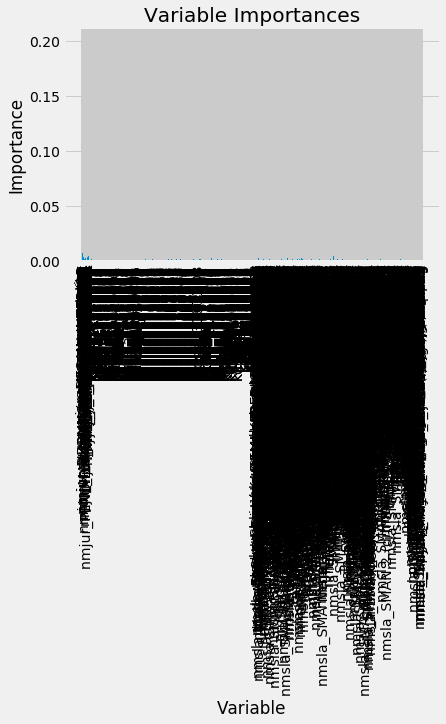

In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [36]:
import pickle

In [37]:
output = open('train_features.pkl', 'wb')
pickle.dump(train_features, output)
output.close()

In [39]:
output = open('train_label.pkl', 'wb')
pickle.dump(train_labels, output)
output.close()

output = open('test_features.pkl', 'wb')
pickle.dump(test_features, output)
output.close()

output = open('test_label.pkl', 'wb')
pickle.dump(test_labels, output)
output.close()

In [40]:
output = open('rf_fit.pkl', 'wb')
pickle.dump(rf.fit, output)
output.close()

output = open('predictions.pkl', 'wb')
pickle.dump(predictions, output)
output.close()

In [50]:
print(rf.fit)

<bound method BaseForest.fit of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>
